# Mental Health

## Data Understanding

The dataset contains the following columns:
- **Age**
- **Gender**
- **Country**
- **state**: If you live in the United States, which state or territory do you live in?
- **self_employed**: Are you self-employed?
- **family_history**: Do you have a family history of mental illness?
- **treatment**: Have you sought treatment for a mental health condition?
- **work_interfere**: If you have a mental health condition, do you feel that it interferes with your work?
- **no_employees**: How many employees does your company or organization have?
- **remote_work**: Do you work remotely (outside of office) at least 50% of the time?
- **tech_company**: Is your employer primarily a tech company/organization?
- **benefits**: Does your employer provide mental health benefits?
- **care_options**: Do you know the options for mental health care your employer provides?
- **wellness_program**: Has your employer ever discussed mental health as part of an employee wellness program?
- **seek_help**: Does your employer provide resources to learn more about mental health issues and how to seek help?
- **anonymity**: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
- **leave**: How easy is it for you to take medical leave for a mental health condition?
- **mental_health_consequence**: Do you think that discussing a mental health issue with your employer would have negative consequences?
- **phys_health_consequence**: Do you think that discussing a physical health issue with your employer would have negative consequences?
- **coworkers**: Would you be willing to discuss a mental health issue with your coworkers?
- **supervisor**: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
- **mental_health_interview**: Would you bring up a mental health issue with a potential employer in an interview?
- **phys_health_interview**: Would you bring up a physical health issue with a potential employer in an interview?
- **mental_vs_physical**: Do you feel that your employer takes mental health as seriously as physical health?
- **obs_consequence**: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
- **comments**: Any additional notes or comments

In [605]:
# Import libraries
import time
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [606]:
# Load dataset
survey_df = pd.read_csv('data/survey.csv')

In [607]:
# Examine first 5 rows
survey_df.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [608]:
# Examine dataset structure to identify possible changes needed in datatypes
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [609]:
# Count NA values to identify missing data
survey_df.isna().sum()[lambda x: x > 0]

state              515
self_employed       18
work_interfere     264
comments          1095
dtype: int64

In [610]:
# Drop comments column since it is mostly empty
survey_df.drop(columns=['comments'], inplace=True)

In [611]:
# Drop timestamp column since it won't be used
survey_df.drop(columns=['Timestamp'], inplace=True)

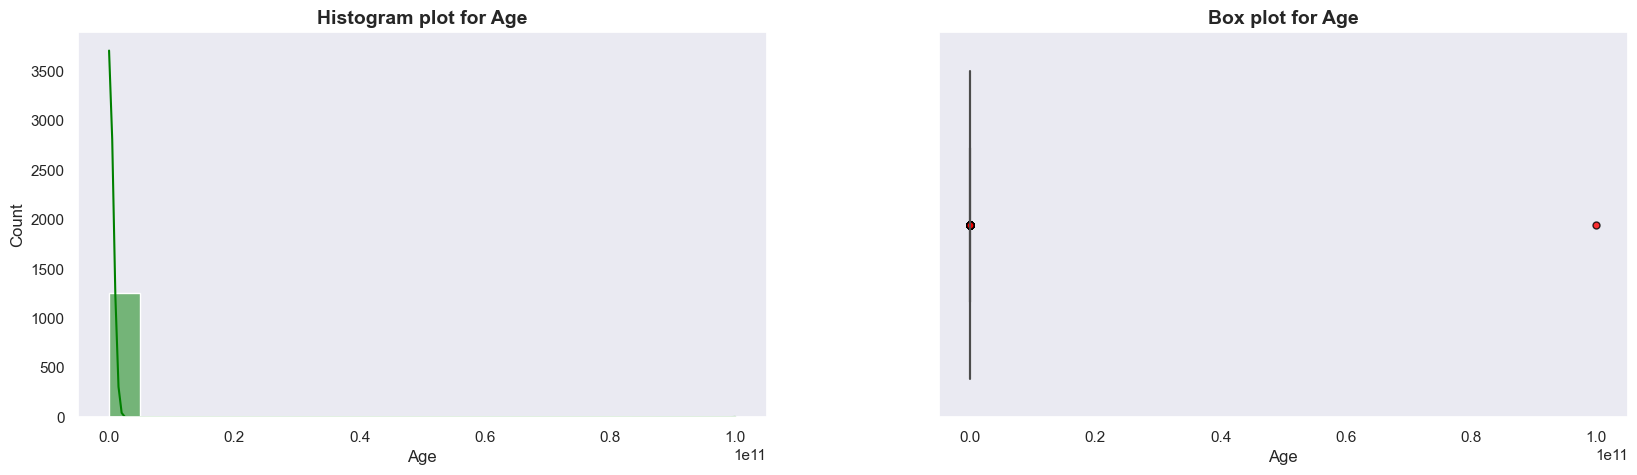

In [612]:
# Create histograms and box plots for numeric columns to inspect their distribution and possible outliers.
sns.set_theme(style='dark', palette='bright')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig.subplots_adjust(hspace=1, wspace=0.25)

flier_props = dict(marker='o', markersize=5, markeredgecolor='black', markerfacecolor='red', alpha=0.8)

col = 'Age'

sns.histplot(
    data=survey_df, x=col, bins=20, kde=True,
    ax=axes[0],
    color='green'
)
axes[0].set_title('Histogram plot for ' + col, fontsize=14, fontweight='bold')

sns.boxplot(
    data=survey_df, x=col,
    ax=axes[1],
    color='blue', flierprops=flier_props,
)
axes[1].set_title('Box plot for ' + col, fontsize=14, fontweight='bold')

plt.show()

In [613]:
# Inspect value counts to identify anomalies in age range
survey_df['Age'].value_counts(dropna=False).sort_index()

-1726            1
-29              1
-1               1
 5               1
 8               1
 11              1
 18              7
 19              9
 20              6
 21             16
 22             21
 23             51
 24             46
 25             61
 26             75
 27             71
 28             68
 29             85
 30             63
 31             67
 32             82
 33             70
 34             65
 35             55
 36             37
 37             43
 38             39
 39             33
 40             33
 41             21
 42             20
 43             28
 44             11
 45             12
 46             12
 47              2
 48              6
 49              4
 50              6
 51              5
 53              1
 54              3
 55              3
 56              4
 57              3
 58              1
 60              2
 61              1
 62              1
 65              1
 72              1
 329             1
 99999999999

Findings: Age column has outliers, this will be addressed durin data preparation

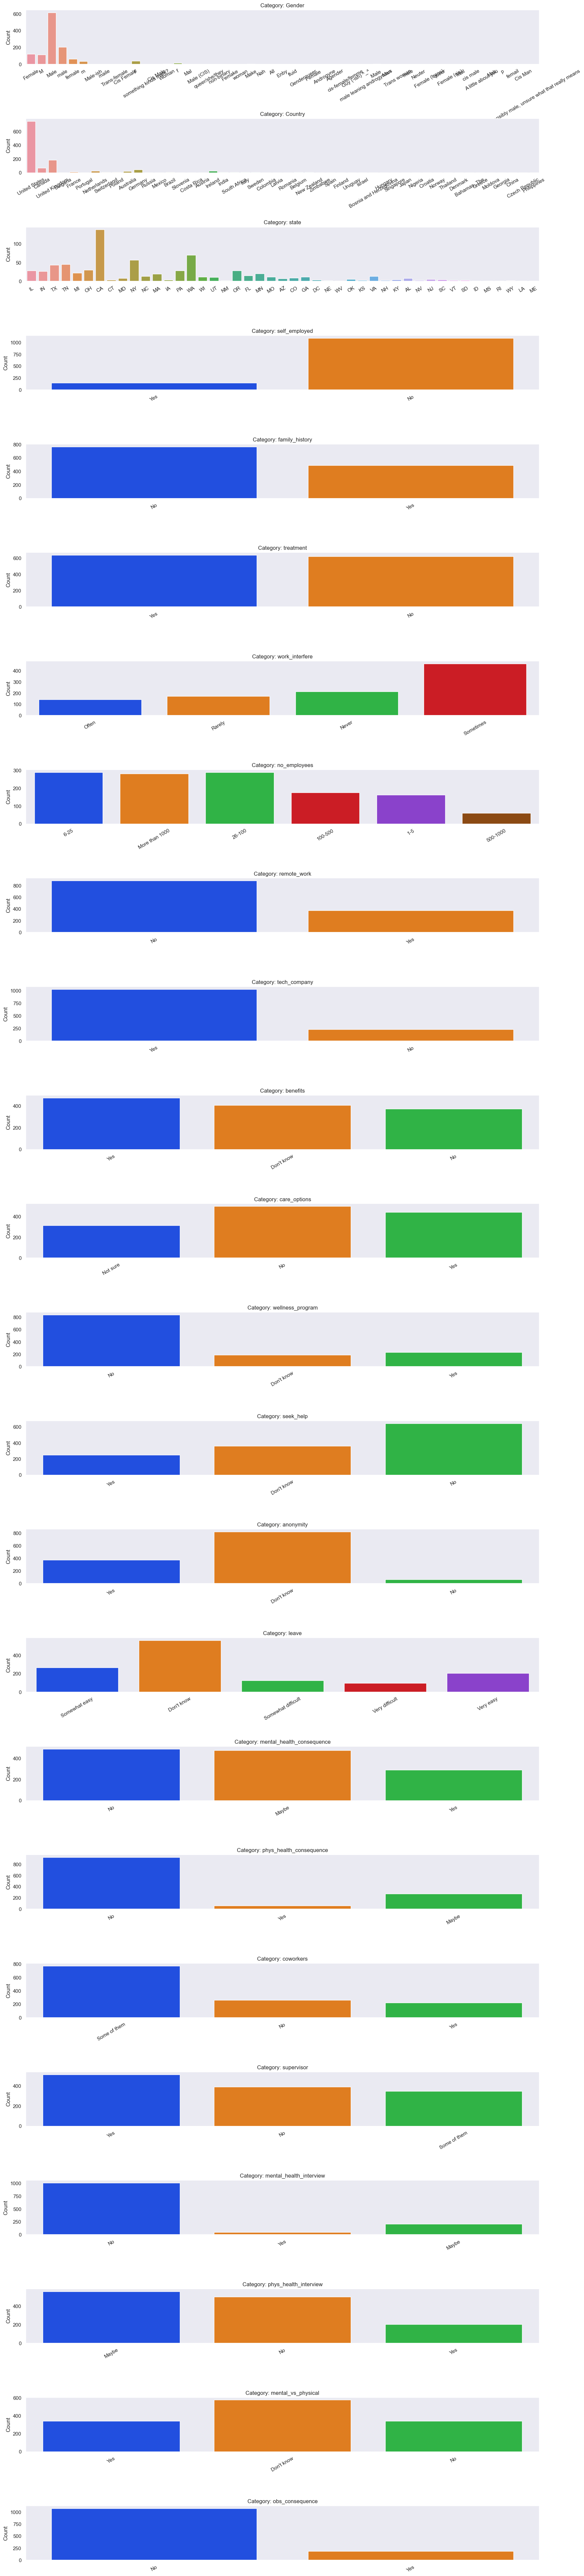

In [614]:
# Create count plots to examine categories
sns.set_theme(style='dark', palette='bright')

fig, axes = plt.subplots(nrows=24, ncols=1, figsize=(20, 100))
fig.subplots_adjust(hspace=1, wspace=1)

i = 0
for col in survey_df.columns:
    if survey_df[col].dtype == 'object':
        sns.countplot(
            data=survey_df,
            x=col,
            ax=axes[i],
        )
        axes[i].set_title('Category: ' + col)
        axes[i].set_ylabel('Count')
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', labelrotation=30)
        i = i + 1

plt.show()

Findings: Data is mostly from U.S., California

[Text(0, 0, '637 (51%)'), Text(0, 0, '622 (49%)')]

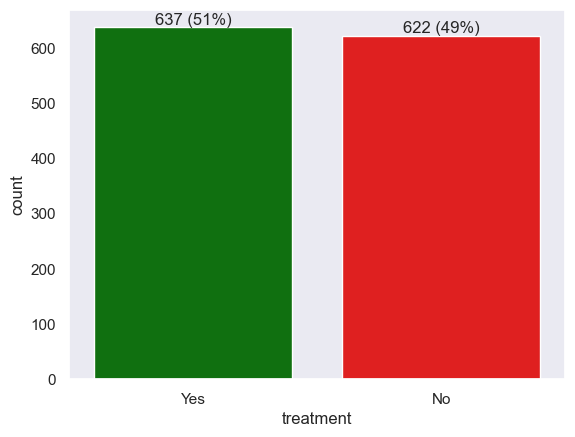

In [615]:
# Examine target class
colors = ['green', 'red']

ax = sns.countplot(
    x=survey_df['treatment'],
    order=survey_df['treatment'].value_counts(ascending=False).index,
    palette=colors,
)

abs_values = survey_df['treatment'].value_counts(ascending=False)
rel_values = survey_df['treatment'].value_counts(ascending=False, normalize=True).values * 100
labels = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=labels)

Finding: target class is balanced, so there is no need to downsampling nor upsampling the dataset.

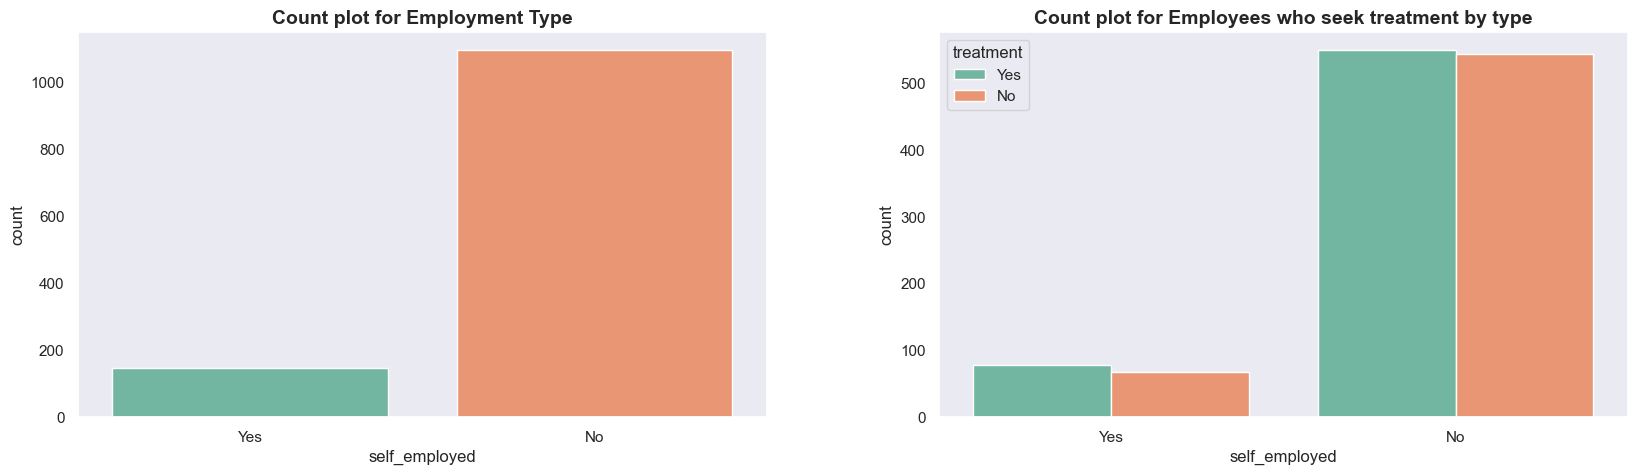

In [616]:
# Analyze employees who seek treatment by employment type.
sns.set_theme(style='dark')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig.subplots_adjust(hspace=1, wspace=0.25)

col = 'self_employed'
sns.countplot(data=survey_df, x=col, palette='Set2', ax=axes[0])
axes[0].set_title('Count plot for Employment Type', fontsize=14, fontweight='bold')

sns.countplot(data=survey_df, x=col, hue='treatment', palette='Set2', ax=axes[1])
axes[1].set_title('Count plot for Employees who seek treatment by type', fontsize=14, fontweight='bold')

plt.show()

Finding:
We can see that employment type does not influence weather an employee seek treatment or not.

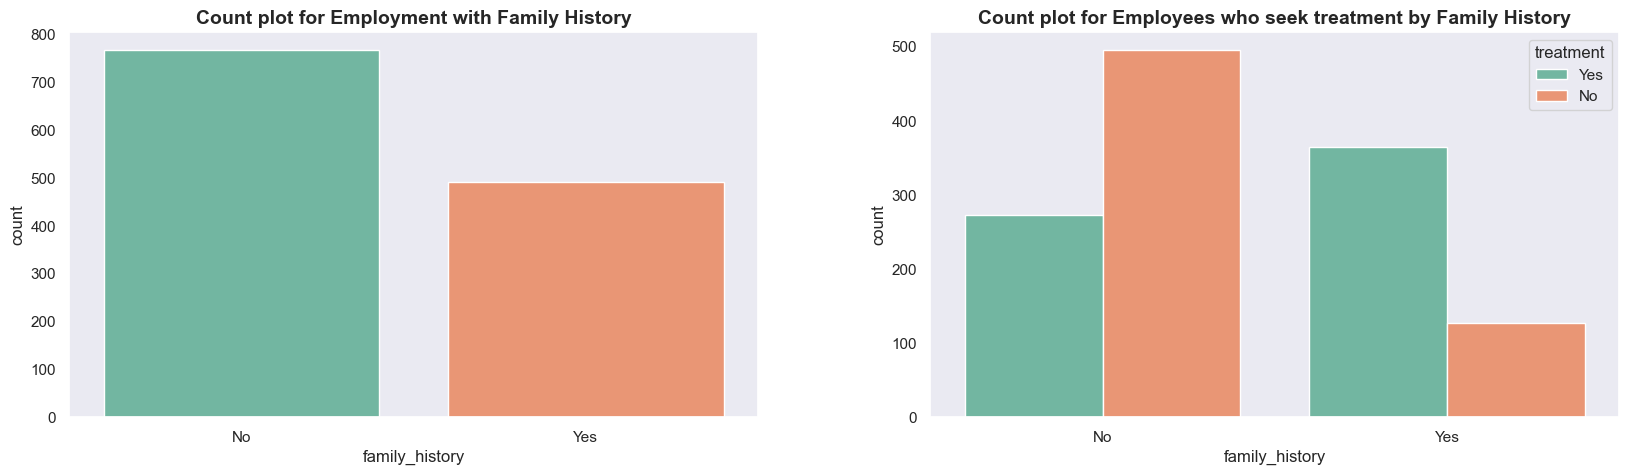

In [617]:
# Analyze employees with a family history of mental illness.
sns.set_theme(style='dark')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig.subplots_adjust(hspace=1, wspace=0.25)

col = 'family_history'
sns.countplot(data=survey_df, x=col, palette='Set2', ax=axes[0])
axes[0].set_title('Count plot for Employment with Family History', fontsize=14, fontweight='bold')

sns.countplot(data=survey_df, x=col, hue='treatment', palette='Set2', ax=axes[1])
axes[1].set_title('Count plot for Employees who seek treatment by Family History', fontsize=14, fontweight='bold')

plt.show()

Finding:
We can see that employees with a family history of metal illness are more likely to seek treatment.

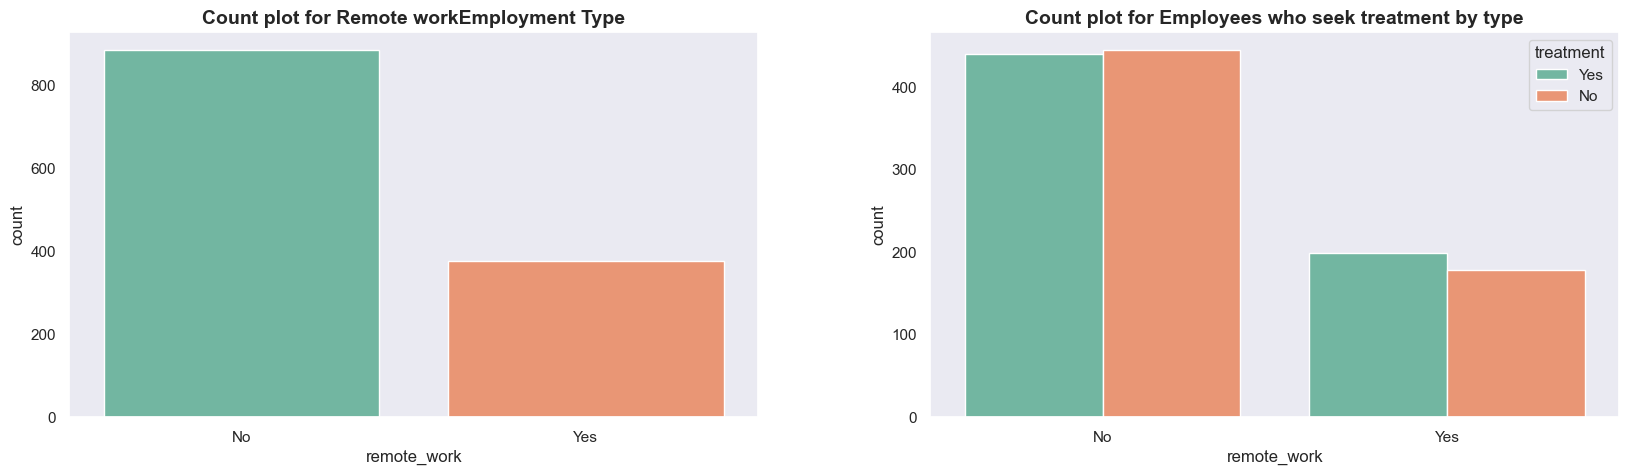

In [618]:
# Analyze employees who seek treatment by employment type.
sns.set_theme(style='dark')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig.subplots_adjust(hspace=1, wspace=0.25)

col = 'remote_work'
sns.countplot(data=survey_df, x=col, palette='Set2', ax=axes[0])
axes[0].set_title('Count plot for Remote workEmployment Type', fontsize=14, fontweight='bold')

sns.countplot(data=survey_df, x=col, hue='treatment', palette='Set2', ax=axes[1])
axes[1].set_title('Count plot for Employees who seek treatment by type', fontsize=14, fontweight='bold')

plt.show()

Finding:
We can see that weather the employee works remote or not, it does not influence an employee seeking treatment.

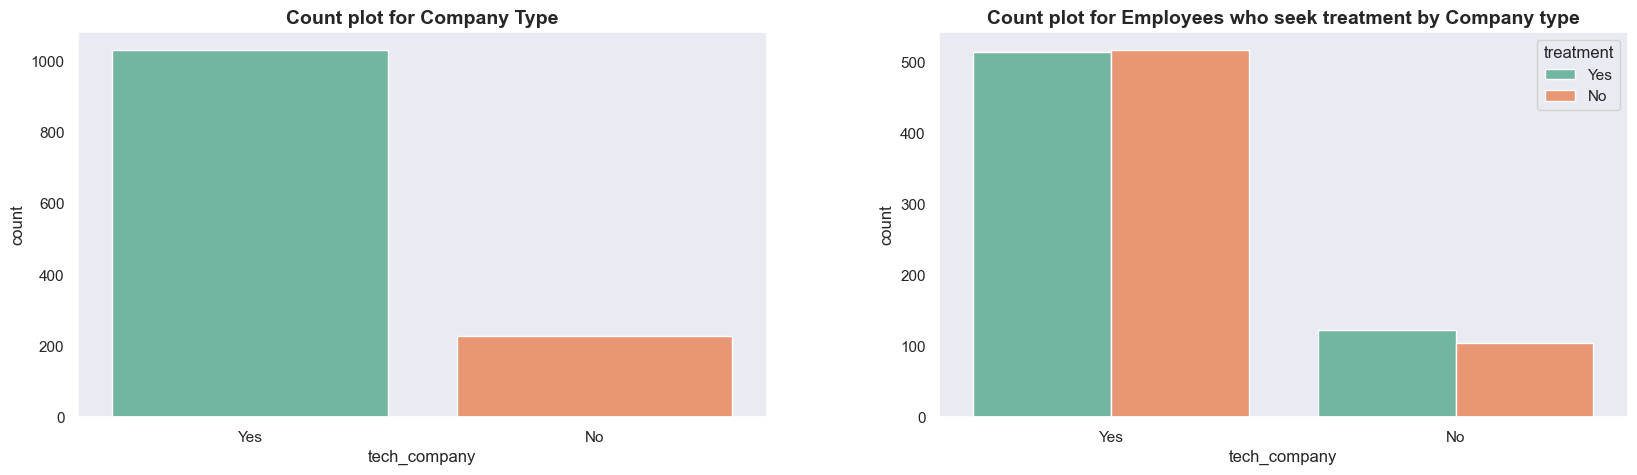

In [619]:
# Analyze employees by company type.
sns.set_theme(style='dark')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig.subplots_adjust(hspace=1, wspace=0.25)

col = 'tech_company'
sns.countplot(data=survey_df, x=col, palette='Set2', ax=axes[0])
axes[0].set_title('Count plot for Company Type', fontsize=14, fontweight='bold')

sns.countplot(data=survey_df, x=col, hue='treatment', palette='Set2', ax=axes[1])
axes[1].set_title('Count plot for Employees who seek treatment by Company type', fontsize=14, fontweight='bold')

plt.show()

Finding:
Although the majority of employees surveyed work in tech companies, this does not influence weather an employee seeks treatment or not.

## Data Preparation
The data preparation phase covers all activities to construct the final dataset (data that will be fed into the modeling tool(s)) from the initial raw data. Data preparation tasks are likely to be performed multiple times, and not in any prescribed order. Tasks include table, record, and attribute selection, data cleaning, construction of new attributes, and transformation of data for modeling tools.

Drop outliers from age column

In [620]:
survey_df = survey_df[(survey_df['Age'] >= 18) & (survey_df['Age'] <= 60)]

Drop country and state columns since most of the data was collected in the U.S. and we won't be able to infer something about the country of origin.

In [621]:
survey_df.drop(columns=['Country', 'state'], inplace=True)

In [622]:
survey_df.drop(columns=['Gender'], inplace=True)

In [623]:
# Convert target variable to numeric
survey_df.rename(columns={'treatment': 'y'}, inplace=True)
survey_df.replace({'y': {'No': 0, 'Yes': 1}, }, inplace=True)

In [624]:
# Observing numeric ranges from descriptive statistics, we can down cast numeric columns to reduce memory usage
int_cols = survey_df.select_dtypes(include=['int64']).columns.tolist()
survey_df[int_cols] = survey_df[int_cols].apply(pd.to_numeric, downcast='integer')

# Also, we can convert object columns to category type to reduce memory usage
object_cols = survey_df.select_dtypes(include=['object']).columns.tolist()
survey_df[object_cols] = survey_df[object_cols].astype("category")

In [625]:
# Exampling dataset structure after cleaning
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1258
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        1247 non-null   int8    
 1   self_employed              1229 non-null   category
 2   family_history             1247 non-null   category
 3   y                          1247 non-null   int8    
 4   work_interfere             986 non-null    category
 5   no_employees               1247 non-null   category
 6   remote_work                1247 non-null   category
 7   tech_company               1247 non-null   category
 8   benefits                   1247 non-null   category
 9   care_options               1247 non-null   category
 10  wellness_program           1247 non-null   category
 11  seek_help                  1247 non-null   category
 12  anonymity                  1247 non-null   category
 13  leave                      1247 n

In [626]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [627]:
# Define preprocessing pipeline to scale numeric columns and apply one-hot encoding to categorical columns
standard_scaler = StandardScaler()
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

numeric_preprocessor = Pipeline(
    steps=[
        ('imputation_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
        ('scale', standard_scaler),
    ],
)

categorical_preprocessor = Pipeline(
    steps=[
        ('imputation_constant', SimpleImputer(fill_value='missing', strategy='constant')),
        ('encode', onehot_encoder),
    ],
)

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numeric_preprocessor, make_column_selector(dtype_exclude='category')),
        ('categorical', categorical_preprocessor, make_column_selector(dtype_include='category')),
    ],
    verbose_feature_names_out=False,
    sparse_threshold=0,
    verbose=True
)

In [628]:
# Apply preprocessing pipeline
survey_df1 = survey_df.copy()
X = survey_df1.drop(columns=['y'])
y = survey_df1['y']

trans = preprocessor.fit_transform(X)
preprocessor.get_feature_names_out()
X_trans = pd.DataFrame(trans, columns=preprocessor.get_feature_names_out())

[ColumnTransformer] ..... (1 of 2) Processing numerical, total=   0.0s
[ColumnTransformer] ... (2 of 2) Processing categorical, total=   0.0s


In [629]:
# Examine dataset ready for fitting the models
X_trans.head(5)

,Age,self_employed_No,self_employed_Yes,self_employed_missing,family_history_No,family_history_Yes,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,...,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_No,obs_consequence_Yes
0,0.713338,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.706278,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.004095,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.137754,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.137754,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


## Modeling

In [630]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.inspection import permutation_importance

In [631]:
# Split bank dataset into a train and test set
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.25, random_state=42)

Before we build our first model, we want to establish a baseline.

In [632]:
# This classifier serves as a simple baseline to compare against other more complex classifiers
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
dummy_clf.predict(X_test)

baseline_score = dummy_clf.score(X_test, y_test)
print(f'Baseline score: {baseline_score.round(2)}')

Baseline score: 0.46


We will use Logistic Regression to build a first model.

In [633]:
# Define estimator pipeline for a basic model
lr_model = LogisticRegression(max_iter=10000)

lr_model.fit(X_train, y_train)

# Examine initial score for the first model
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy Score: {accuracy: .2f}')

Test Accuracy Score:  0.79


In [634]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75       145
           1       0.76      0.88      0.82       167

    accuracy                           0.79       312
   macro avg       0.80      0.78      0.78       312
weighted avg       0.79      0.79      0.79       312



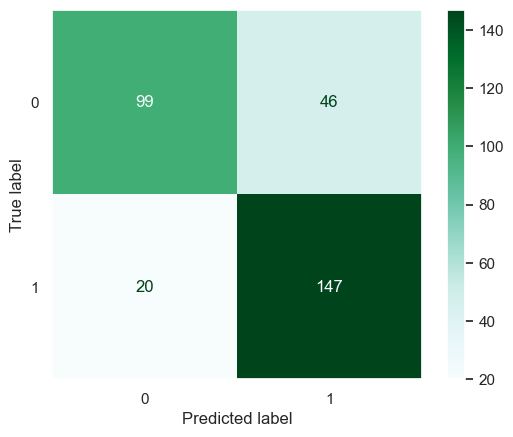

In [635]:
# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.BuGn)

Model comparison

In [636]:
# Define dataframe to store results for different models
model_results = pd.DataFrame(columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])

In [637]:
# Create list of models for evaluation and comparison
names = [
    'K-Nearest Neighbors',
    'Logistic Regression',
    'Decision Tree',
    'Support Vector Machine',
]

classifiers = [
    KNeighborsClassifier(),
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    SVC(),
]

In [638]:
# Train and score models
i = 0
for name, clf in zip(names, classifiers):
    begin = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    total = round(end - begin, 3)
    score_train = clf.score(X_train, y_train)
    score_test = clf.score(X_test, y_test)
    print(f'{name} completed in {total}s, train={score_train.round(2)}, test={score_test.round(2)}')
    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    new_row = pd.DataFrame(
        {
            'Model': name,
            'Train Time': total,
            'Train Accuracy': train_accuracy.round(2),
            'Test Accuracy': test_accuracy.round(2),
        },
        index=[i]
    )
    i = i + 1
    model_results = pd.concat([model_results, new_row])

K-Nearest Neighbors completed in 0.001s, train=0.83, test=0.75
Logistic Regression completed in 0.016s, train=0.85, test=0.79
Decision Tree completed in 0.016s, train=1.0, test=0.7
Support Vector Machine completed in 0.068s, train=0.87, test=0.81


In [639]:
# Display model scores
model_results

,Model,Train Time,Train Accuracy,Test Accuracy
0,K-Nearest Neighbors,0.001,0.83,0.75
1,Logistic Regression,0.016,0.85,0.79
2,Decision Tree,0.016,1.00,0.70
3,Support Vector Machine,0.068,0.87,0.81


Findings:
Logistic Regression and Support Vector Machine performed the best
Decision Tree over fit the dataset

## Model Improvement

In [640]:
# Define table for grid search results
grid_search_results = pd.DataFrame(
    columns=['Model', 'Best Parameters', 'Best Score']
)

In [641]:
# Define list of grid parameters for each model evaluated
params_grid = [
    # K-Nearest Neighbors parameters
    {
        'n_neighbors': range(2, 31),
    },
    # Logistic Regression parameters
    {
        'C': np.logspace(-4, 4, 20),
        'penalty': ['l1', 'l2'],  # l1=lasso, l2=ridge
        'solver': ['liblinear'],
        'max_iter': [1000]
    },
    # 'Decision Tree parameters
    {
        'criterion': ['gini', 'entropy'],
        'max_depth': [2, 4, 6, 8, 10, 12]
    },
    # Support Vector Machine parameters
    {
        'C': [0.1, 1, 10],
        'gamma': [1, 0.1, 0.01],
        'kernel': ['rbf']
    }
]

In [642]:
# Perform grid search for each model
i = 0
for name, clf, param_grid in zip(names, classifiers, params_grid):
    grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=False, verbose=1)
    grid_search = grid.fit(X_train, y_train)
    best_score = grid_search.best_score_ * 100
    print(f'Grid search for {name} completed, best score is: {best_score:.2f}')
    new_row = pd.DataFrame(
        {
            'Model': name,
            'Best Parameters': str(grid_search.best_params_),
            'Best Score': best_score.round(2),
        },
        index=[i]
    )
    grid_search_results = pd.concat([grid_search_results, new_row])
    i = i + 1

Fitting 5 folds for each of 29 candidates, totalling 145 fits
Grid search for K-Nearest Neighbors completed, best score is: 75.83
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Grid search for Logistic Regression completed, best score is: 83.74
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Grid search for Decision Tree completed, best score is: 83.42
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Grid search for Support Vector Machine completed, best score is: 83.42


In [643]:
# Display metrics and parameters for best model using grid search
grid_search_results

,Model,Best Parameters,Best Score
0,K-Nearest Neighbors,{'n_neighbors': 11},75.83
1,Logistic Regression,"{'C': 0.08858667904100823, 'max_iter': 1000, '...",83.74
2,Decision Tree,"{'criterion': 'gini', 'max_depth': 2}",83.42
3,Support Vector Machine,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",83.42


# Final Model

In [644]:
# Define estimator
final_model = LogisticRegression(C=0.8858, penalty='l1', solver='liblinear', max_iter=10000)

# Fit the model
final_model.fit(X_train, y_train)

LogisticRegression(C=0.8858, max_iter=10000, penalty='l1', solver='liblinear')

In [645]:
# Examine initial score for a basic model
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy Score: {accuracy: .2f}')

Test Accuracy Score:  0.79


In [646]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.68      0.75       145
           1       0.76      0.89      0.82       167

    accuracy                           0.79       312
   macro avg       0.80      0.78      0.78       312
weighted avg       0.80      0.79      0.79       312



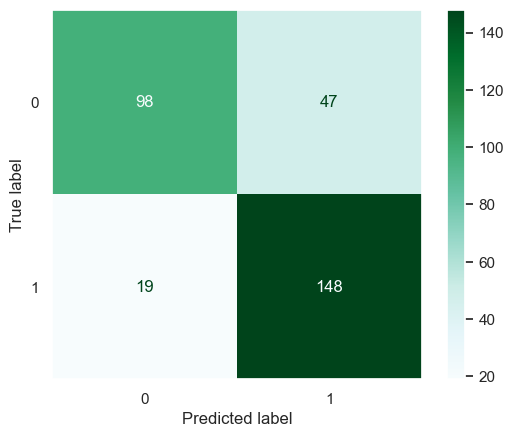

In [647]:
# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.BuGn)

In [648]:
# Display ROC and Precision-Recall Curves for better understanding
y_score = final_model.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=final_model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='Logistic Regression')

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=final_model.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall, estimator_name='Logistic Regression')

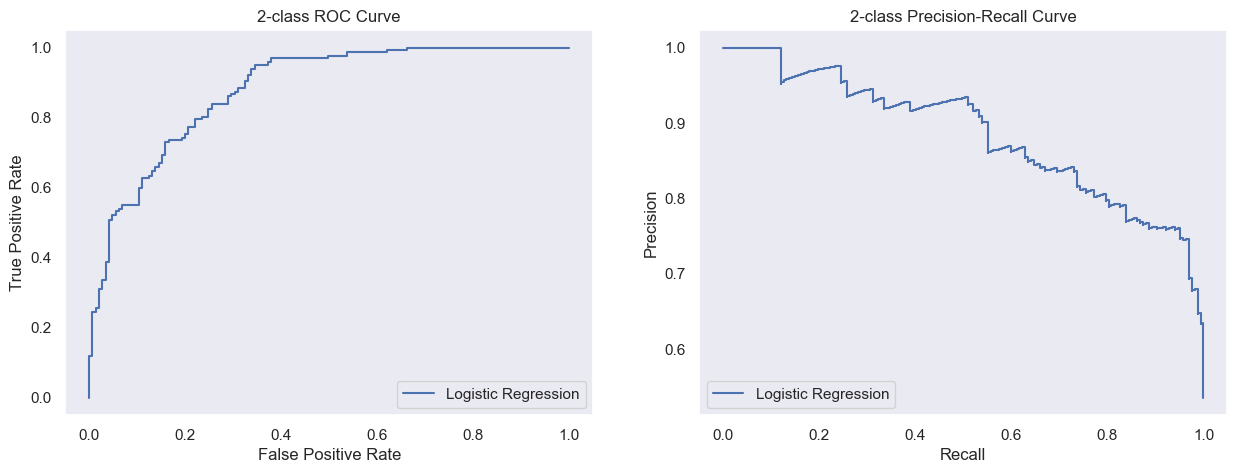

In [649]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

roc_display.plot(ax=ax1)
roc_display.ax_.set_title('2-class ROC Curve')

pr_display.plot(ax=ax2)
pr_display.ax_.set_title('2-class Precision-Recall Curve')

plt.show()